# Machine Learning

The objective of the project is to build the best 'Linear Regression' model to predict the number of Bike demands. For this reason, you have to start by building 3 models and comparing them:

- First, by using your implementation-from-scratch of linear regression with gradient descent

- Second, by using your implementation of the closed form solution (normal equation)

- Third, by using te Scikit Learn library

Then you have to do feature engineering (dummy variables for instance) to optimize your model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
bike_rental_df = pd.read_csv('./Bike Rental UCI dataset.csv')
bike_rental_df = pd.concat([bike_rental_df, pd.get_dummies(bike_rental_df['dayOfWeek']), pd.get_dummies(bike_rental_df['season'], prefix='Season'), pd.get_dummies(bike_rental_df['hr'], prefix='Hour'), pd.get_dummies(bike_rental_df['mnth'], prefix='Month'), pd.get_dummies(bike_rental_df['yr'], prefix='Year')], axis=1)
bike_rental_df.drop(columns=['dayOfWeek', 'hr', 'season', 'mnth', 'yr'], inplace=True)


bike_rental_df.head(10)

# columns 
# holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
#        'days', 'demand', 'Fri', 'Mon', 'Sat', 'Sun', 'Thr', 'Tue', 'Wed',
#        'Season_1', 'Season_2', 'Season_3', 'Season_4', 'Hour_0', 'Hour_1',
#        'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
#        'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
#        'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
#        'Hour_21', 'Hour_22', 'Hour_23', 'Month_1', 'Month_2', 'Month_3',
#        'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
#        'Month_10', 'Month_11', 'Month_12', 'Year_0', 'Year_1'

,holiday,workingday,weathersit,temp,hum,windspeed,days,demand,Fri,Mon,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_0,Year_1
0,0,0,1,0.24,0.81,0.0000,0,16,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0.22,0.80,0.0000,0,40,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.22,0.80,0.0000,0,32,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0.24,0.75,0.0000,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0.24,0.75,0.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,2,0.24,0.75,0.0896,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,1,0.22,0.80,0.0000,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,1,0.20,0.86,0.0000,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,1,0.24,0.75,0.0000,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,1,0.32,0.76,0.0000,0,14,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
def normalisation(feature):
    return (feature - feature.mean()) / feature.std()

## 1. Implementation from scratch of Linear regression

In [26]:
class LogisticRegressionScratch():
    
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
        
    def prediction(self,X,params):
        return X.dot(params)

    def compute_cost(self,X,Y,params):
        m = len(Y)
        return np.sum((X.dot(params) - Y) ** 2)/(2 * m)
    
    def gradient_descent(self,X,Y,params,alph, n_iter, delta):
        
        m = len(Y)
        cur_iter = 0
        cur_delta = 1000
        cost_history = []
        params_history = []
        last_cost = self.compute_cost(X,Y,params) + 1 

        
        while cur_iter < n_iter and cur_delta > delta:
            prediction = self.prediction(X,params)
            loss = prediction - Y
            
            gradient = X.T.dot(loss)/m
            params = params - alph * gradient
            params_history.append(params)
            
            cost = self.compute_cost(X,Y,params)
            cost_history.append(cost)
            
            cur_delta = abs(last_cost - cost)
            last_cost = cost
            cur_iter +=1
            
        return params, cost_history, cur_iter
    
    def RSME(self,X,Y,params):
        MSE = np.sum((self.prediction(X,params) - Y)**2)
        RSME = np.sqrt(MSE/m)
        return RSME
    
    def R2(self,X,Y,params):
        SSR = np.sum((self.prediction(X,params) - Y)**2)
        SST = np.sum((Y - np.mean(Y))**2)
        R2 = 1 - (SSR/SST)
        return R2

In [27]:
feature = bike_rental_df[['temp','windspeed', "hum","windspeed", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun", 
                          'Hour_0', 'Hour_1','Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
                          'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
                          'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
                          'Hour_21', 'Hour_22', 'Hour_23','Month_1', 'Month_2', 'Month_3',
                          'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                          'Month_10', 'Month_11', 'Month_12', 'Year_0', 'Year_1']]

m = len(feature)

X_norm = np.array(feature).astype(np.float).reshape(m,feature.shape[1])
X = np.insert(X_norm, 0, np.ones(m), axis=1)

Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

params = np.zeros((X.shape[1],1))

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



First cost :  0.5021072913129241
Final cost 0.16421780576588635 with 863 iterations.

RMSE 0.4794781106023013
R2_SCORE TRAIN 0.6729368375362792
R2_SCORE TEST 0.6730722687208995


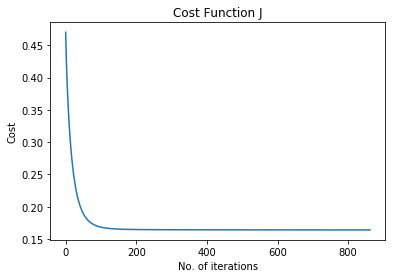

In [28]:
model_Scratch = LogisticRegressionScratch(X_train,y_train)

print('First cost : ', model_Scratch.compute_cost(X_train,y_train,params))
params_optimal, cost_history, n_iter = model_Scratch.gradient_descent(X_train,y_train,params,alph = 0.5, n_iter=1000, delta = 0.0000001)
print('Final cost',cost_history[n_iter-1], 'with',n_iter,'iterations.\n')

print('RMSE', model_Scratch.RSME(X_train,y_train,params_optimal))
R2_scratch = model_Scratch.R2(X_train, y_train,params_optimal)
print('R2_SCORE TRAIN', R2_scratch)
R2_scratch_test = model_Scratch.R2(X_test, y_test,params_optimal)
print('R2_SCORE TEST', R2_scratch_test)

plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.show()

## 2. Normal equation

In [96]:
class NormalEquation():
        
    def normalEquation(self,X,Y):
        X_transpose = X.T
        X_transpose_dot_X = X_transpose.dot(X)
        X_inv = np.linalg.inv(X_transpose_dot_X)
        X_transpose_dot_Y = X_transpose.dot(Y)
        
        return np.dot(X_inv,X_transpose_dot_Y)
    
    def prediction(self,X,params):
        return X.dot(params)
    
    def RSME(self,X,Y,params):
        MSE = np.sum((self.prediction(X,params) - Y)**2)
        RSME = np.sqrt(MSE/m)
        return RSME
    
    def R2(self,X,Y,params):
        SSR = np.sum((self.prediction(X,params) - Y)**2)
        SST = np.sum((Y - np.mean(Y))**2)
        R2 = 1 - (SSR/SST)
        return R2

In [103]:
feature = bike_rental_df[['temp','windspeed', "hum","windspeed", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun", 
                          'Hour_0', 'Hour_1','Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
                          'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
                          'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
                          'Hour_21', 'Hour_22', 'Hour_23','Month_1', 'Month_2', 'Month_3',
                          'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                          'Month_10', 'Month_11', 'Month_12', 'Year_0', 'Year_1']]

m = len(feature)

X = np.array(feature).astype(np.float).reshape(m,feature.shape[1])
X = np.insert(X, 0, np.ones(m), axis=1)

Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



In [104]:
model_NormalEquation = NormalEquation()

params = model_NormalEquation.normalEquation(X,Y)


model_NormalEquation.normalEquation(X,Y)
model_NormalEquation.prediction(X,params)
print('RMSE', model_NormalEquation.RSME(X,Y,params))
R2_normalEquation = model_NormalEquation.R2(X,Y,params) 
print('R2_SCORE', R2_normalEquation)

RMSE 11.607483122056502
R2_SCORE -133.73366442882656


## 3. Scikit Learn model

In [10]:
feature = bike_rental_df[['temp','windspeed', "hum","windspeed", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun", 
                          'Hour_0', 'Hour_1','Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
                          'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
                          'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
                          'Hour_21', 'Hour_22', 'Hour_23','Month_1', 'Month_2', 'Month_3',
                          'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                          'Month_10', 'Month_11', 'Month_12', 'Year_0', 'Year_1']]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)


Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



In [11]:
model_ScikitLearn = LinearRegression().fit(X,Y)

y_prediction = model_ScikitLearn.predict(X)
print('RMSE', mean_squared_error(Y, y_prediction))
R2_scikitLearn = r2_score(Y, y_prediction)
print('R2_SCORE:', R2_scikitLearn)

RMSE 0.32673166603226766
R2_SCORE: 0.6732683339677323


## Comparaison

In [12]:
print('Difference Scratch and NormalEquation:', abs(R2_scratch - R2_normalEquation))
print('Difference Scratch and ScikitLearn:', abs(R2_scratch - R2_scikitLearn))
print('Difference ScikitLearn et NormalEquation:', abs(R2_scikitLearn - R2_normalEquation))

Difference Scratch and NormalEquation: 134.4013540177091
Difference Scratch and ScikitLearn: 0.005578745085167425
Difference ScikitLearn et NormalEquation: 134.4069327627943


We can see that *R<sup>2</sup>* is the same between the Normal Equation and Scikit Learn model. 

## Feature engineering

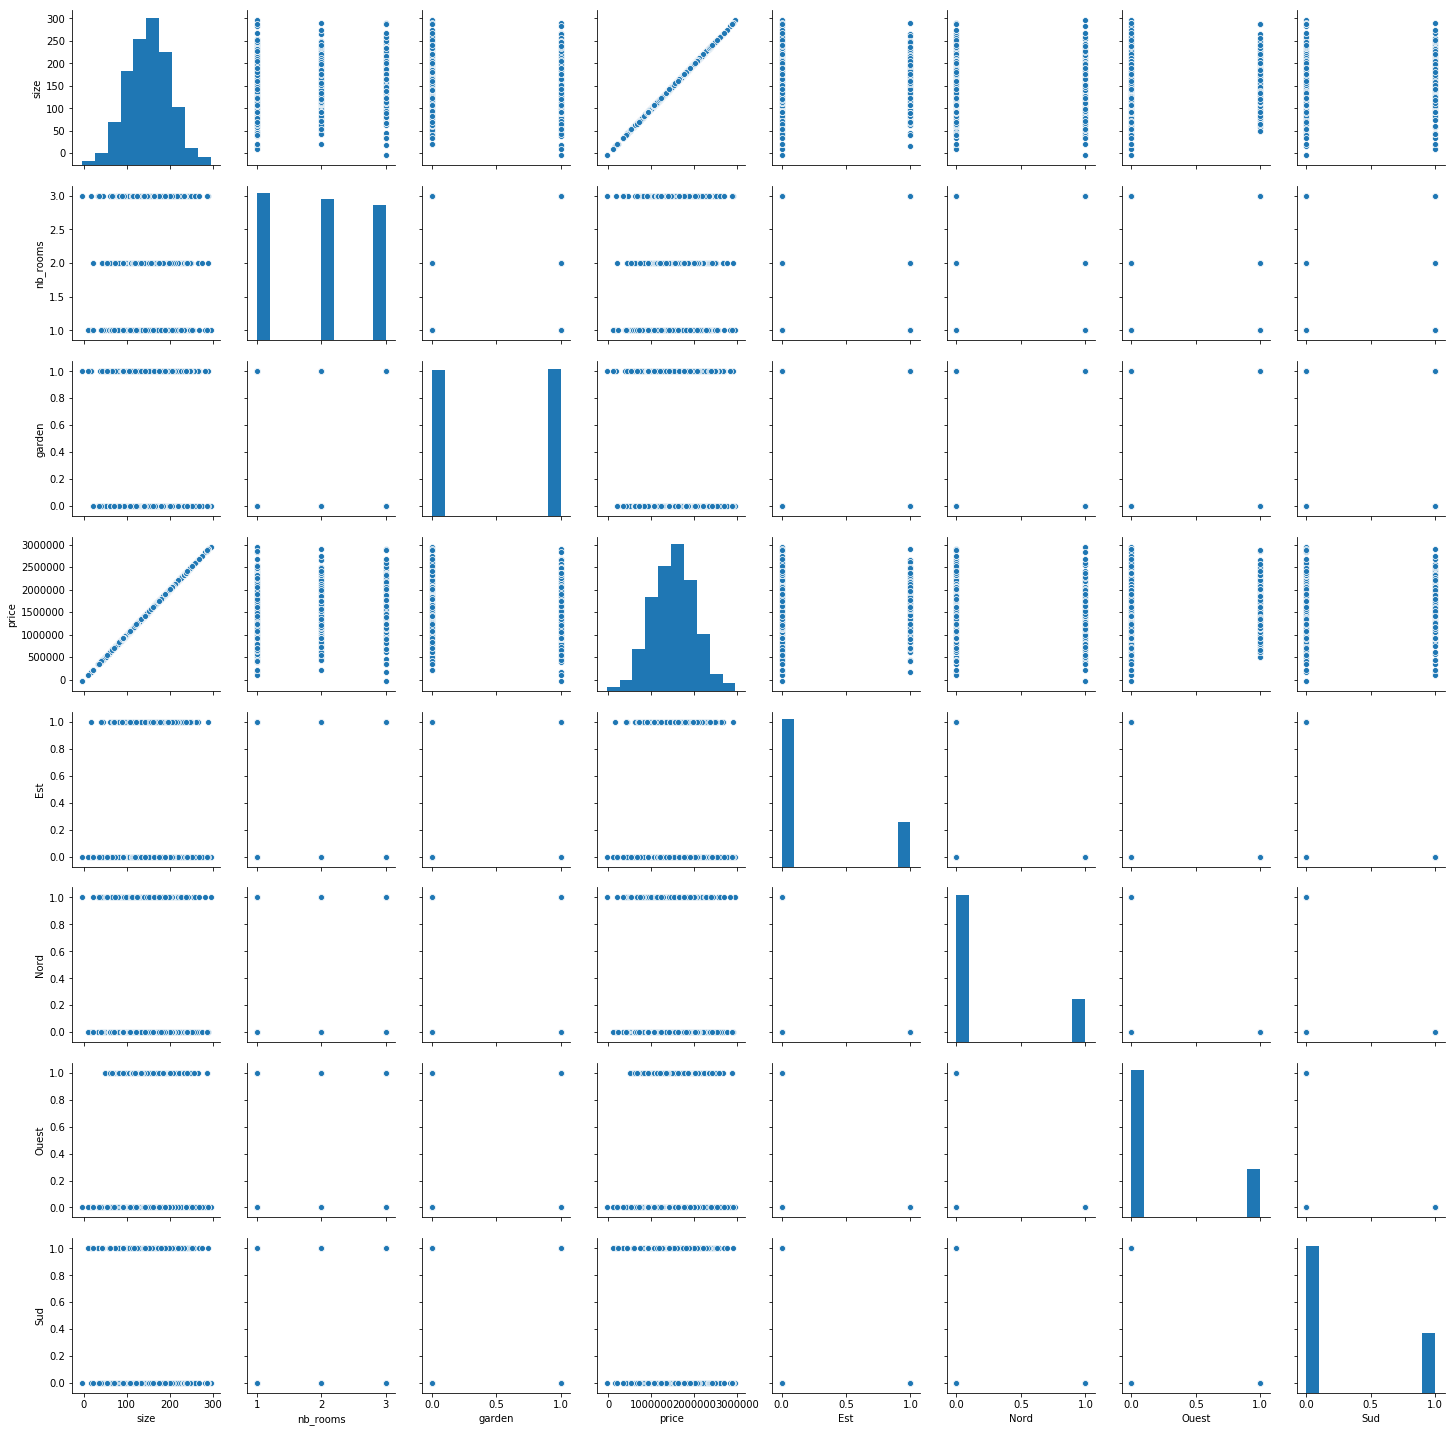

In [13]:
house_df = pd.read_csv('../../Python-for-datascience/TP1/house.csv')
house_df = pd.concat([house_df, pd.get_dummies(house_df['orientation'])], axis=1)
house_df.drop(columns='orientation', inplace=True)
sns.pairplot(house_df)

In [14]:
house_df.head(10)

,size,nb_rooms,garden,price,Est,Nord,Ouest,Sud
0,95.056637,3,1,9.514363e+05,1,0,0,0
1,139.862079,3,1,1.401691e+06,0,0,0,1
2,224.064203,3,0,2.239801e+06,0,0,1,0
3,193.014152,1,1,1.931833e+06,0,0,1,0
4,215.683859,1,1,2.158777e+06,0,1,0,0
5,203.231329,3,0,2.032797e+06,0,1,0,0
6,198.035370,2,1,1.980077e+06,0,1,0,0
7,77.249254,2,0,7.732205e+05,1,0,0,0
8,145.876344,2,1,1.459998e+06,0,0,1,0
9,50.094402,1,0,5.019483e+05,0,0,1,0


In [105]:
feature = house_df[['size', 'nb_rooms', 'garden']]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)

params = np.zeros((X.shape[1],1))

Y = np.array(house_df['price']).reshape((len(house_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 950 



Final cost 5.0011250601130775e-05 with 66 iterations.

RMSE 1.0
R2_SCORE 1.1102230246251565e-16


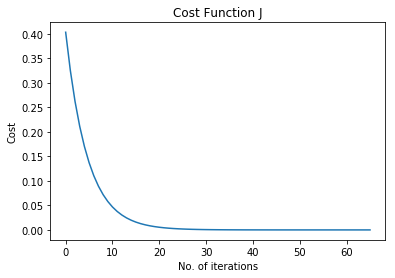

In [108]:
model_Scratch = LogisticRegressionScratch(X,Y)

theta_final, cost_history, n_iter = model_Scratch.gradient_descent(X,Y,params,alph = 0.5, n_iter=1000, delta = 0.0000001)
print('Final cost',cost_history[n_iter-1], 'with',n_iter,'iterations.\n')
print('RMSE', model_Scratch.RSME(X,Y,params))
R2_scratch = model_Scratch.R2(X,Y,params)
print('R2_SCORE', R2_scratch)


plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.show()